In [1]:
#Run this notebook in the root directory of the project
%cd ../../../

/data/main/2024/GridCellsCond


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import analysis_utils as a_utils
import analysis_pred_utils as a_pred_utils
import sim_utils as s_utils

## Network based positional bias

In [12]:
"""
Load Data
"""
predictive_data={}
raw_data={}
cell_to_analyse=32
sim_id = "VALD-PRED-NET-S-s-1a"
predictive_data[sim_id]={}
raw_data[sim_id]={}
params = s_utils.load_sim_params(sim_id)
bounds = (params["extra_params"]["dir_change_t"],int(params["sim_dur"]))
stell_spks_l, intrnrn_spks_l = s_utils.load_spikes(sim_id)
true_pos = a_pred_utils.decode_pos_by_intrnrn(intrnrn_spks_l,params,win_size=100)
stell_decoded_pos= a_utils.decode_pos(stell_spks_l,params)
stell_syn_inhib_g = s_utils.load_data(sim_id,"stell_syn_inhib_g",cell_n=cell_to_analyse)
bounds = (params["extra_params"]["dir_change_t"],int(params["sim_dur"]))
raw_data[sim_id]["stell_spks"] = stell_spks_l
raw_data[sim_id]["intrnrn_spks"]=intrnrn_spks_l
raw_data[sim_id]["params"] =params
raw_data[sim_id]["true_pos"] =true_pos
raw_data[sim_id]["stell_syn_inhib_g"] =stell_syn_inhib_g
raw_data[sim_id]["stell_decoded_pos"] =stell_decoded_pos

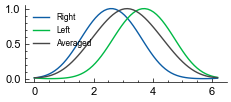

In [13]:
plt.style.use("analysis/config/paper.mplstyle")
sim_id = "VALD-PRED-NET-S-s-1a"
fig,axs = plt.subplots(1,1,figsize=(2.6,1))
win_size=7
cell_spks_r = np.array(raw_data[sim_id]["stell_spks"][cell_to_analyse])
cell_spks_l = np.array(raw_data[sim_id]["stell_spks"][cell_to_analyse+raw_data[sim_id]["params"]["N_per_sheet"]])
separate_fields_r = a_pred_utils.remove_uneven_fields(cell_spks_r,(raw_data[sim_id]["params"]["allothetic_dur"],bounds[0]))
separate_fields_l = a_pred_utils.remove_uneven_fields(cell_spks_l,(bounds[0]+raw_data[sim_id]["params"]["allothetic_dur"],bounds[1]))
field_pos_l = a_pred_utils.calculate_field_positions(separate_fields_l,raw_data[sim_id]["true_pos"])
field_pos_r = a_pred_utils.calculate_field_positions(separate_fields_r,raw_data[sim_id]["true_pos"])
convoled_l = a_pred_utils.convole_field_pos(field_pos_l,raw_data[sim_id]["params"],win_size=win_size)
convoled_l=np.mean(convoled_l,axis=0)
convoled_l=convoled_l
convoled_r = a_pred_utils.convole_field_pos(field_pos_r,raw_data[sim_id]["params"],win_size=win_size)
convoled_r=np.mean(convoled_r,axis=0)
convoled_r=convoled_r
pos = np.arange(0,raw_data[sim_id]["params"]["lambda0"],raw_data[sim_id]["params"]["lambda0"]/raw_data[sim_id]["params"]["n_phases"])
means = np.mean(np.row_stack((convoled_l,convoled_r)),axis=0)
axs.plot(pos,convoled_r/np.max(convoled_r),label="Right",c="#0C5DA5")
axs.plot(pos,convoled_l/np.max(convoled_l),label="Left",c="#00B945")
axs.plot(pos,means/np.max(means),label="Averaged",c="#474747")
plt.legend(fontsize=6,loc="upper left")
peak_l=pos[np.argmax(convoled_l)]
peak_r=pos[np.argmax(convoled_r)]
peak_mean=pos[np.argmax(means)]
plt.savefig(f"analysis/figures/Fig5/Fig5_H_top.svg")
plt.show()


In [15]:
win = signal.windows.gaussian(4000,300)
filtered = signal.convolve(raw_data[f"{sim_id}"]["stell_syn_inhib_g"], win, mode='same') / sum(win)

In [20]:
sim_id = "VALD-PRED-NET-S-s-1a"
x = np.arange(0,raw_data[f"{sim_id}"]["params"]["sim_dur"],raw_data[f"{sim_id}"]["params"]["recorder_dt"])
start=13900
end=raw_data[f"{sim_id}"]["stell_spks"][cell_to_analyse][132]
idx=np.argmax(filtered[int((start/0.25)):int(((end)/0.25))])
peak1=x[int((start/0.25)):int(((end)/0.25))][idx]
print(peak1)

start=raw_data[f"{sim_id}"]["stell_spks"][cell_to_analyse][151]
end=raw_data[f"{sim_id}"]["stell_spks"][cell_to_analyse][152]
idx=np.argmax(filtered[int((start/0.25)):int(((end)/0.25))])
peak2=x[int((start/0.25)):int(((end)/0.25))][idx]
print(peak2)

start=raw_data[f"{sim_id}"]["stell_spks"][cell_to_analyse][171]
end=20100-20
idx=np.argmax(filtered[int((start/0.25)):int(((end)/0.25))])
peak3=x[int((start/0.25)):int(((end)/0.25))][idx]
print(peak3)

ValueError: attempt to get argmax of an empty sequence

In [19]:
diff1=(raw_data[f"{sim_id}"]["stell_spks"][cell_to_analyse][132]-peak1)
diff2=(peak2-raw_data[f"{sim_id}"]["stell_spks"][cell_to_analyse][151])
print(round(diff1),round(diff2))

diff3=(raw_data[f"{sim_id}"]["stell_spks"][cell_to_analyse][152]-peak2)
diff4=(peak3-raw_data[f"{sim_id}"]["stell_spks"][cell_to_analyse][171])
print(round(diff3),round(diff4))

NameError: name 'peak1' is not defined

NameError: name 'peak1' is not defined

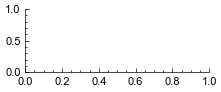

In [18]:
%matplotlib inline
cell_to_analyse = 96
plt.style.use("analysis/config/paper.mplstyle")
sim_id = "VALD-PRED-NET-S-s-1a"
x = np.arange(0,raw_data[f"{sim_id}"]["params"]["sim_dur"],raw_data[f"{sim_id}"]["params"]["recorder_dt"])
fig,axs = plt.subplots(1,1,figsize=(2.375,0.82))

axs.axvline(x=peak1,linestyle="--")
axs.axvline(x=peak2,linestyle="--")
axs.axvline(x=peak3,linestyle="--")

axs.axvline(x=raw_data[f"{sim_id}"]["stell_spks"][cell_to_analyse][132],linestyle="--",c="#474747")
axs.axvline(x=raw_data[f"{sim_id}"]["stell_spks"][cell_to_analyse][152],linestyle="--",c="#474747")
axs.axvline(x=raw_data[f"{sim_id}"]["stell_spks"][cell_to_analyse][151],linestyle="--",c="#474747")
axs.axvline(x=raw_data[f"{sim_id}"]["stell_spks"][cell_to_analyse][171],linestyle="--",c="#474747")
axs.plot(x,raw_data[f"{sim_id}"]["stell_syn_inhib_g"],c="black",linewidth=0.75)
axs.eventplot(raw_data[f"{sim_id}"]["stell_spks"][cell_to_analyse],linelengths=0.0008,linewidth=0.65,lineoffsets=0.001,color="red")

axs.set_xlim([13900,17700])
axs.set_ylim([-0.0005,0.0055])
plt.savefig(f"analysis/figures/Fig5/Fig5_J_bottom.svg")

In [21]:
sim_id = "VALD-PRED-NET-S-s-1a"
fspk = raw_data[f"{sim_id}"]["stell_spks"][cell_to_analyse][132].astype("int") #round to recorer dt
recorder_dt = raw_data[f"{sim_id}"]["params"]["recorder_dt"]
first_spike_inhib_hcn=raw_data[f"{sim_id}"]["stell_syn_inhib_g"][int(fspk/recorder_dt)]
print(f"{first_spike_inhib_hcn:.2e}")

sim_id = "VALD-PRED-NET-S-s-1a"
fspk = raw_data[f"{sim_id}"]["stell_spks"][cell_to_analyse][152].astype("int") #round to recorer dt
recorder_dt = raw_data[f"{sim_id}"]["params"]["recorder_dt"]
first_spike_inhib_hcn=raw_data[f"{sim_id}"]["stell_syn_inhib_g"][int(fspk/recorder_dt)]
print(f"{first_spike_inhib_hcn:.2e}")

1.89e-07
2.98e-08


In [22]:
sim_id = "VALD-PRED-NET-S-s-1a"
lspk = raw_data[f"{sim_id}"]["stell_spks"][cell_to_analyse][151].astype("int")
recorder_dt = raw_data[f"{sim_id}"]["params"]["recorder_dt"]
last_spike_inhib_hcn=raw_data[f"{sim_id}"]["stell_syn_inhib_g"][int(lspk/recorder_dt)]
print(f"{last_spike_inhib_hcn:.2e}")

sim_id = "VALD-PRED-NET-S-s-1a"
lspk = raw_data[f"{sim_id}"]["stell_spks"][cell_to_analyse][171].astype("int")
print(lspk)
recorder_dt = raw_data[f"{sim_id}"]["params"]["recorder_dt"]
last_spike_inhib_hcn=raw_data[f"{sim_id}"]["stell_syn_inhib_g"][int(lspk/recorder_dt)]
print(f"{last_spike_inhib_hcn:.2e}")

2.14e-08
15257
5.03e-06


In [23]:
sim_id = "VALD-PRED-NET-S-s-1a"
field_size = a_pred_utils.calc_field_size(raw_data[sim_id]["stell_spks"],raw_data[sim_id]["true_pos"],raw_data[sim_id]["params"],bounds)
bias = a_pred_utils.calc_bias_stell_intrnrn(raw_data[sim_id]["stell_decoded_pos"],raw_data[sim_id]["true_pos"],raw_data[sim_id]["params"],bounds)
print(bias*100/(2*np.pi))
print(np.abs(bias)*100/field_size)
np.abs(bias)

8.721959492855433
27.92281388025708


0.5480168773532477

## Network based retrospective bias

In [5]:
"""
Load Data
"""
predictive_data={}
raw_data={}
cell_to_analyse=32
sim_id = "VALD-PRED-NET-S-s-2a"
predictive_data[sim_id]={}
raw_data[sim_id]={}
params = s_utils.load_sim_params(sim_id)
stell_spks_l, intrnrn_spks_l = s_utils.load_spikes(sim_id)
true_pos = a_pred_utils.decode_pos_by_intrnrn(intrnrn_spks_l,params,win_size=100)
stell_decoded_pos= a_utils.decode_pos(stell_spks_l,params)
stell_syn_inhib_g = s_utils.load_data(sim_id,"stell_syn_inhib_g",cell_n=cell_to_analyse)
bounds = (params["extra_params"]["dir_change_t"],int(params["sim_dur"]))
raw_data[sim_id]["stell_spks"] = stell_spks_l
raw_data[sim_id]["intrnrn_spks"]=intrnrn_spks_l
raw_data[sim_id]["params"] =params
raw_data[sim_id]["true_pos"] =true_pos
raw_data[sim_id]["stell_syn_inhib_g"] =stell_syn_inhib_g
raw_data[sim_id]["stell_decoded_pos"] =stell_decoded_pos

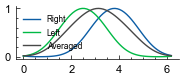

In [10]:
plt.style.use("analysis/config/paper.mplstyle")
sim_id = "VALD-PRED-NET-S-s-2a"
fig,axs = plt.subplots(1,1,figsize=(2.1,0.69))

win_size=7
cell_spks_r = np.array(raw_data[sim_id]["stell_spks"][cell_to_analyse])
cell_spks_l = np.array(raw_data[sim_id]["stell_spks"][cell_to_analyse+raw_data[sim_id]["params"]["N_per_sheet"]])
separate_fields_r = a_pred_utils.remove_uneven_fields(cell_spks_r,(raw_data[sim_id]["params"]["allothetic_dur"],bounds[0]))
separate_fields_l = a_pred_utils.remove_uneven_fields(cell_spks_l,(bounds[0]+raw_data[sim_id]["params"]["allothetic_dur"],bounds[1]))
field_pos_l = a_pred_utils.calculate_field_positions(separate_fields_l,raw_data[sim_id]["true_pos"])
field_pos_r = a_pred_utils.calculate_field_positions(separate_fields_r,raw_data[sim_id]["true_pos"])
convoled_l = a_pred_utils.convole_field_pos(field_pos_l,raw_data[sim_id]["params"],win_size=win_size)
convoled_l=np.mean(convoled_l,axis=0)
convoled_l=convoled_l
convoled_r = a_pred_utils.convole_field_pos(field_pos_r,raw_data[sim_id]["params"],win_size=win_size)
convoled_r=np.mean(convoled_r,axis=0)
convoled_r=convoled_r
pos = np.arange(0,raw_data[sim_id]["params"]["lambda0"],raw_data[sim_id]["params"]["lambda0"]/raw_data[sim_id]["params"]["n_phases"])
means = np.mean(np.row_stack((convoled_l,convoled_r)),axis=0)
axs.plot(pos,convoled_r/np.max(convoled_r),label="Right")
axs.plot(pos,convoled_l/np.max(convoled_l),label="Left")
axs.plot(pos,means/np.max(means),label="Averaged",c="#474747")
plt.legend(fontsize=6,loc="center left")
peak_l=pos[np.argmax(convoled_l)]
peak_r=pos[np.argmax(convoled_r)]
peak_mean=pos[np.argmax(means)]
plt.savefig(f"analysis/figures/Fig5/Fig5_J.svg")
plt.show()


In [7]:
import h5py

sim_id = "VALD-PRED-INT-S-s-1a"
params = s_utils.load_sim_params(sim_id)
center_cell = int(params["N_per_sheet"]/2)
with h5py.File(f"network_configs/connections/saved_matrices/matrix_{params["conn_id"]}_{params["matrix_id"]}.hdf5","r") as f:
    matrx_normal = np.array(f["matrix"])
is_out_norm = matrx_normal[params["N_stell"]+center_cell,:params["N_per_sheet"]]

sim_id = "VALD-PRED-NET-S-s-1a"
params = s_utils.load_sim_params(sim_id)
with h5py.File(f"network_configs/connections/saved_matrices/matrix_{params["conn_id"]}_{params["matrix_id"]}.hdf5","r") as f:
    matrx_modified_prosp = np.array(f["matrix"])
is_out_prosp = matrx_modified_prosp[params["N_stell"]+center_cell,:params["N_per_sheet"]]

sim_id = "VALD-PRED-NET-S-s-2a"
params = s_utils.load_sim_params(sim_id)
with h5py.File(f"network_configs/connections/saved_matrices/matrix_{params["conn_id"]}_{params["matrix_id"]}.hdf5","r") as f:
    matrx_modified_retro = np.array(f["matrix"])
is_out_retro = matrx_modified_retro[params["N_stell"]+center_cell,:params["N_per_sheet"]]


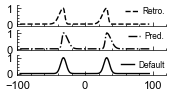

In [14]:
plt.style.use("analysis/config/paper.mplstyle")
plt.rcParams["legend.frameon"]=True
sim_id = "VALD-PRED-NET-S-s-1a"
x = np.arange(-params["N_per_sheet"]/2,params["N_per_sheet"]/2)
fig,axs = plt.subplots(3,1,figsize=(1.769+0.15,0.71+0.2),sharex=True)
axs[2].plot(x,is_out_norm/np.max(is_out_norm),label="Default",c="k",linewidth=1)
axs[2].set_xlim([-100,120])
axs[2].set_ylim([-0.1,1.2])
axs[2].legend(loc="center right",fontsize=6,handlelength=1.5,borderpad=0.2,borderaxespad=0,handletextpad=0.5,frameon=False)

axs[1].plot(x,is_out_prosp/np.max(is_out_prosp),label="Pred.",c="k",linewidth=1,linestyle="dashdot")
axs[1].set_xlim([-100,120])
axs[1].set_ylim([-0.1,1.2])

axs[1].legend(loc="upper right",fontsize=6,handlelength=1.5,borderpad=0.2,borderaxespad=0,handletextpad=0.5,frameon=False)
axs[0].plot(x,is_out_retro/np.max(is_out_retro),label="Retro.",linewidth=1,c="k",linestyle="dashed")
axs[0].set_xlim([-100,120])
axs[0].set_ylim([-0.1,1.2])
axs[0].legend(loc="upper right",fontsize=6,handlelength=1.5,borderpad=0.2,borderaxespad=0,handletextpad=0.5,frameon=False)
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
plt.savefig(f"analysis/figures/Fig5/Fig5_G.svg")



In [15]:
asym_factor_arr = np.linspace(0.1,0.9,9)
sim_id = "VALD-PRED-NET-S-m-1a"
params = s_utils.load_sim_params(sim_id)["0"]
bias_prosp = np.full_like(asym_factor_arr,np.nan)
n_trials = 1
sim_num = 0
fact = 2
bounds = (params["extra_params"]["dir_change_t"],int(params["sim_dur"]))
for asym_fact in asym_factor_arr[:7]:
    for tr in range(n_trials):
        print(sim_num,end=" ")
        stell_spks_l,intrnrn_spks_l=s_utils.load_spikes(sim_id,sim_num=sim_num)
        true_pos = a_pred_utils.decode_pos_by_intrnrn(intrnrn_spks_l,params,win_size=80)
        stell_decoded = a_utils.decode_pos(stell_spks_l,params)
        field_size=a_pred_utils.calc_field_size(stell_spks_l,true_pos,params,bounds)
        bias=a_pred_utils.calc_bias_stell_intrnrn(stell_decoded,true_pos,params,bounds)
        bias_prosp[sim_num]=(bias/field_size)*100
        sim_num+=1

asym_factor_arr = np.linspace(0.1,0.9,9)
sim_id = "VALD-PRED-NET-S-m-2a"

params = s_utils.load_sim_params(sim_id)["0"]
bias_retro = np.full_like(asym_factor_arr,np.nan)
n_trials = 1
sim_num = 0
fact = 2
bounds = (params["extra_params"]["dir_change_t"]+params["allothetic_dur"],int(params["sim_dur"]))
for asym_fact in asym_factor_arr[:7]:
    for tr in range(n_trials):
        print(sim_num,end=" ")
        stell_spks_l,intrnrn_spks_l=s_utils.load_spikes(sim_id,sim_num=sim_num)
        true_pos = a_pred_utils.decode_pos_by_intrnrn(intrnrn_spks_l,params,win_size=80)
        stell_decoded = a_utils.decode_pos(stell_spks_l,params)
        field_size=a_pred_utils.calc_field_size(stell_spks_l,true_pos,params,bounds)
        bias=a_pred_utils.calc_bias_stell_intrnrn(stell_decoded,true_pos,params,bounds)
        bias_retro[sim_num]=(bias/field_size)*100
        sim_num+=1


0 1 2 3 4 5 6 0 1 2 3 4 5 6 

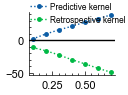

In [16]:

plt.style.use("analysis/config/paper.mplstyle")
fig,ax=plt.subplots(1,1,figsize=(1.113,0.820))
ax.plot(asym_factor_arr,bias_prosp,marker="o",linestyle="dotted",markersize=2.5,label="Predictive kernel")
ax.plot(asym_factor_arr,bias_retro,marker="o",markersize=2.5,linestyle="dotted",label="Retrospective kernel")
ax.axhline(y=0,c="black",linestyle="solid")
fig.legend(borderpad=0.1,handletextpad=0.4,fontsize=6,loc="upper right",borderaxespad=0.25)
plt.savefig(f"analysis/figures/Fig5/Fig5_I_bottom.svg")


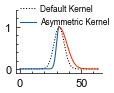

In [17]:
def asymmetric_gaussian(x, N,mu, sigma_left, sigma_right):
    return N*np.where(
        x < mu,
        np.exp(-((x - mu) ** 2) / (2 * sigma_left ** 2)),
        np.exp(-((x - mu) ** 2) / (2 * sigma_right ** 2)))
x= np.linspace(0,64,1000)
is_asym_factor = [1-0.5,1+0.5]
stdev=4.157961783
kernel=asymmetric_gaussian(x, 1, 32, stdev*is_asym_factor[0],stdev*is_asym_factor[1])
kernel_norm=asymmetric_gaussian(x, 1, 32, stdev,stdev)
kernel_left= kernel[:500]
kernel_right= kernel[500:]
plt.style.use("analysis/config/paper.mplstyle")
fig,ax=plt.subplots(1,1,figsize=(1.113,0.820))
ax.plot(x,kernel_norm,c="k",linestyle="dotted",label="Default Kernel",linewidth=0.75)
ax.plot(x[:500],kernel_left,c="#0C5DA5",linewidth=0.75,label="Asymmetric Kernel")
ax.plot(x[500:],kernel_right,c="#FF2C00",linewidth=0.75)
ax.set_ylim([-0.1,1.4])
fig.legend(loc="upper right",fontsize=6,borderpad=0.1,handletextpad=0.4)
plt.savefig(f"analysis/figures/Fig5/Fig5_I_top.svg")